<a href="https://colab.research.google.com/github/asim5800/Online-Retail-Customer-Segmentation-/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline



from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from plotnine import *

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Online Retail Customer Segmentation-Asim Siddiqui/Online Retail.xlsx')

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
print('Number of redundant entries in dataset:',df.duplicated().sum())

Number of redundant entries in dataset: 5268


In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.shape

(536641, 8)

In [ ]:
for col in df:
    print(df[col].nunique())

25900
4070
4223
722
23260
1630
4372
38


In [ ]:
print(df.apply(lambda col: col.unique()))

InvoiceNo      [536365, 536366, 536367, 536368, 536369, 53637...
StockCode      [85123A, 71053, 84406B, 84029G, 84029E, 22752,...
Description    [WHITE HANGING HEART T-LIGHT HOLDER, WHITE MET...
Quantity       [6, 8, 2, 32, 3, 4, 24, 12, 48, 18, 20, 36, 80...
InvoiceDate    [2010-12-01T08:26:00.000000000, 2010-12-01T08:...
UnitPrice      [2.55, 3.39, 2.75, 7.65, 4.25, 1.85, 1.69, 2.1...
CustomerID     [17850.0, 13047.0, 12583.0, 13748.0, 15100.0, ...
Country        [United Kingdom, France, Australia, Netherland...
dtype: object


In [ ]:
df[df.Quantity < 0].shape[0]

10587

In [ ]:
df[df.UnitPrice < 0].shape[0]

2

In [ ]:
len(df[(df['Quantity']<0)])

10587

In [ ]:
df1 = df.drop(df[(df.Quantity < 0)|(df.UnitPrice < 0)].index)

In [ ]:
df1.describe()

,Quantity,UnitPrice,CustomerID
count,526052.000000,526052.000000,392732.000000
mean,10.730911,3.913818,15287.734822
std,157.592136,36.053205,1713.567773
min,1.000000,0.000000,12346.000000
25%,1.000000,1.250000,13955.000000
50%,4.000000,2.080000,15150.000000
75%,11.000000,4.130000,16791.000000
max,80995.000000,13541.330000,18287.000000


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 526052 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    526052 non-null  object        
 1   StockCode    526052 non-null  object        
 2   Description  525460 non-null  object        
 3   Quantity     526052 non-null  int64         
 4   InvoiceDate  526052 non-null  datetime64[ns]
 5   UnitPrice    526052 non-null  float64       
 6   CustomerID   392732 non-null  float64       
 7   Country      526052 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.1+ MB


In [ ]:
#sns.pairplot(df1)

In [ ]:
df1.dropna(inplace=True)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392732 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  object        
 1   StockCode    392732 non-null  object        
 2   Description  392732 non-null  object        
 3   Quantity     392732 non-null  int64         
 4   InvoiceDate  392732 non-null  datetime64[ns]
 5   UnitPrice    392732 non-null  float64       
 6   CustomerID   392732 non-null  float64       
 7   Country      392732 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.0+ MB


In [ ]:
df1['InvoiceNo'] = df1['InvoiceNo'].astype('str')

In [ ]:
df1['InvoiceNo'].str.contains('C').value_counts()

False    392732
Name: InvoiceNo, dtype: int64

In [ ]:

df1=df1[~df1['InvoiceNo'].str.contains('C')]

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392732 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  object        
 1   StockCode    392732 non-null  object        
 2   Description  392732 non-null  object        
 3   Quantity     392732 non-null  int64         
 4   InvoiceDate  392732 non-null  datetime64[ns]
 5   UnitPrice    392732 non-null  float64       
 6   CustomerID   392732 non-null  float64       
 7   Country      392732 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.0+ MB


In [ ]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


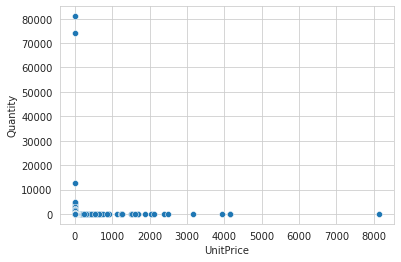

In [ ]:

sns.scatterplot(x='UnitPrice',y='Quantity',data=df1);

In [ ]:
df1["InvoiceDate"] = pd.to_datetime(df1["InvoiceDate"], format="%Y-%m-%d %H:%M:%S")

In [ ]:
df1['Day']=df1['InvoiceDate'].dt.day_name()

In [ ]:
df1["year"] = df1["InvoiceDate"].apply(lambda x: x.year)
df1["month"] = df1["InvoiceDate"].apply(lambda x: x.month)
df1["month_day"] = df1["InvoiceDate"].apply(lambda x: x.day)
df1["hour"] = df1["InvoiceDate"].apply(lambda x: x.hour)

In [ ]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,year,month,month_day,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,2010,12,1,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,2010,12,1,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8


In [ ]:
df1.shape

(392732, 13)

In [ ]:
df1['Country'].nunique()

37

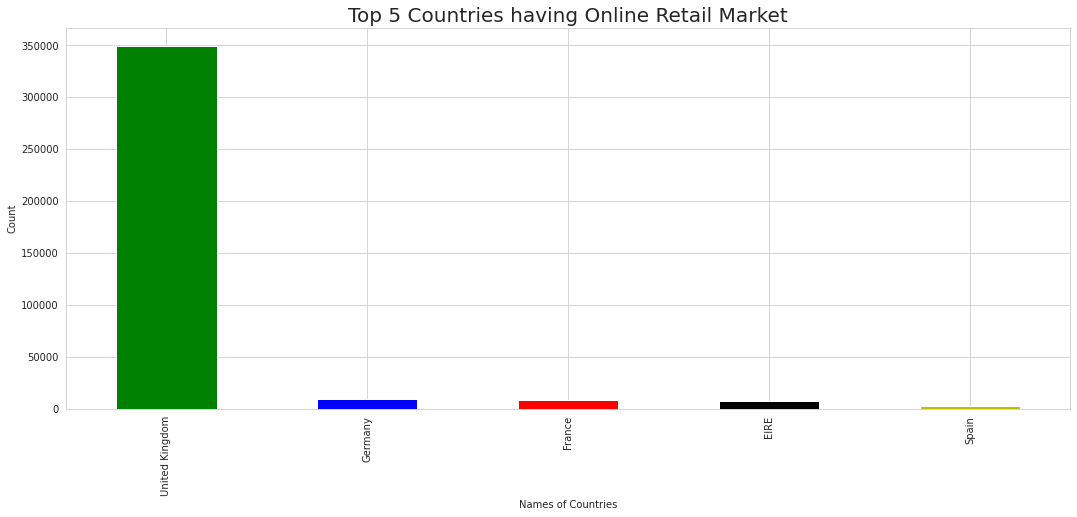

In [ ]:

# checking the different values for country in the dataset
my_colors = ['g', 'b', 'r', 'k', 'y', 'm', 'c']
df1['Country'].value_counts().head(5).plot.bar(figsize = (18, 7),color=my_colors)
plt.title('Top 5 Countries having Online Retail Market', fontsize = 20)
plt.xlabel('Names of Countries')
plt.ylabel('Count')
plt.show()

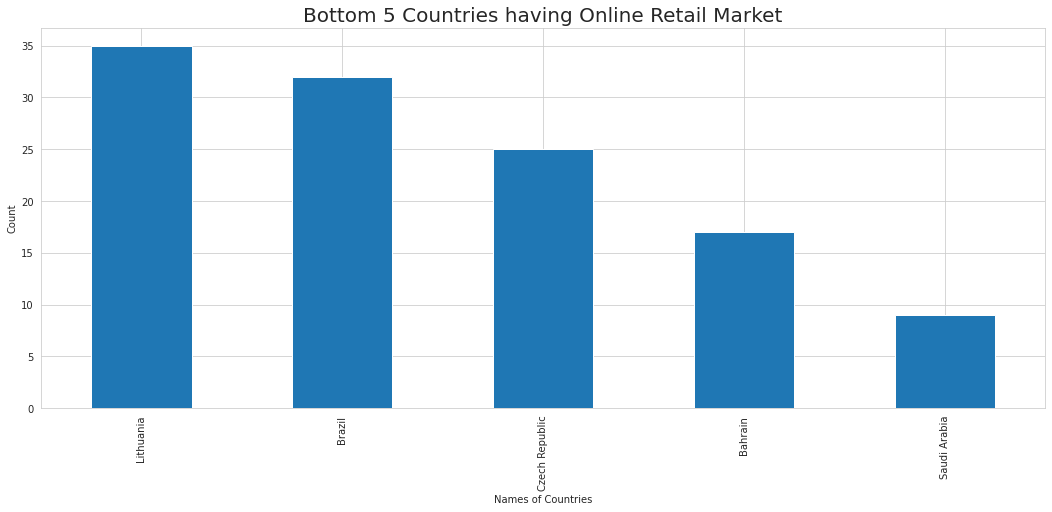

In [ ]:
df1['Country'].value_counts().tail(5).plot.bar(figsize = (18, 7))
plt.title('Bottom 5 Countries having Online Retail Market', fontsize = 20)
plt.xlabel('Names of Countries')
plt.ylabel('Count')
plt.show()

In [ ]:
df1['Description'].nunique()

3877

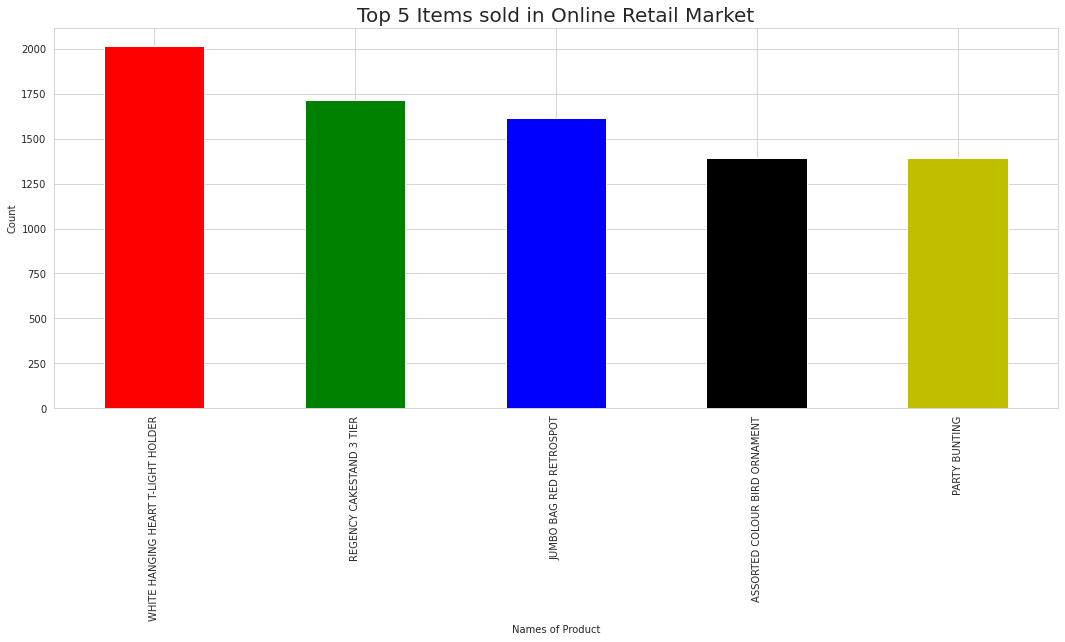

In [ ]:
my_colors1 = ['r', 'g', 'b', 'k', 'y', 'm', 'c']
df1['Description'].value_counts().head(5).plot.bar(figsize = (18, 7),color=my_colors1)
plt.title('Top 5 Items sold in Online Retail Market', fontsize = 20)
plt.xlabel('Names of Product')
plt.ylabel('Count')
plt.show()

In [ ]:
df1['Description'].value_counts().tail(200)

BREAD BIN, DINER STYLE, MINT         1
PINK CHRISTMAS FLOCK DROPLET         1
PURPLE ENAMEL FLOWER HAIR TIE        1
BLACK DIAMOND CLUSTER NECKLACE       1
ASSORTED COLOUR SILK GLASSES CASE    1
                                    ..
CROCHET DOG KEYRING                  1
STORAGE TIN VINTAGE DOILEY           1
BEADED LOVE HEART JEWELLERY SET      1
PURPLE GLASS TASSLE BAG CHARM        1
IVORY PANTRY HANGING LAMP            1
Name: Description, Length: 200, dtype: int64

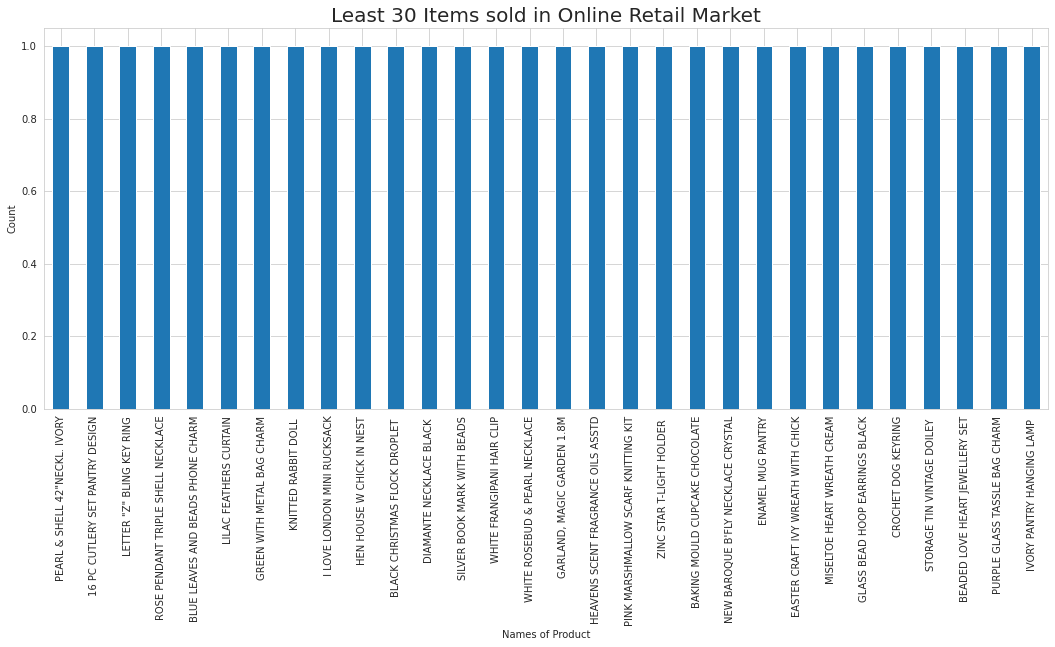

In [ ]:
df1['Description'].value_counts().tail(30).plot.bar(figsize = (18, 7))
plt.title('Least 30 Items sold in Online Retail Market', fontsize = 20)
plt.xlabel('Names of Product')
plt.ylabel('Count')
plt.show()


In [ ]:
df1['CustomerID'].nunique()# so we have in total 4339 customers

4339

In [ ]:
df1['CustomerID'].value_counts()

17841.0    7676
14911.0    5672
14096.0    5111
12748.0    4413
14606.0    2677
           ... 
18233.0       1
18184.0       1
17846.0       1
14090.0       1
16093.0       1
Name: CustomerID, Length: 4339, dtype: int64

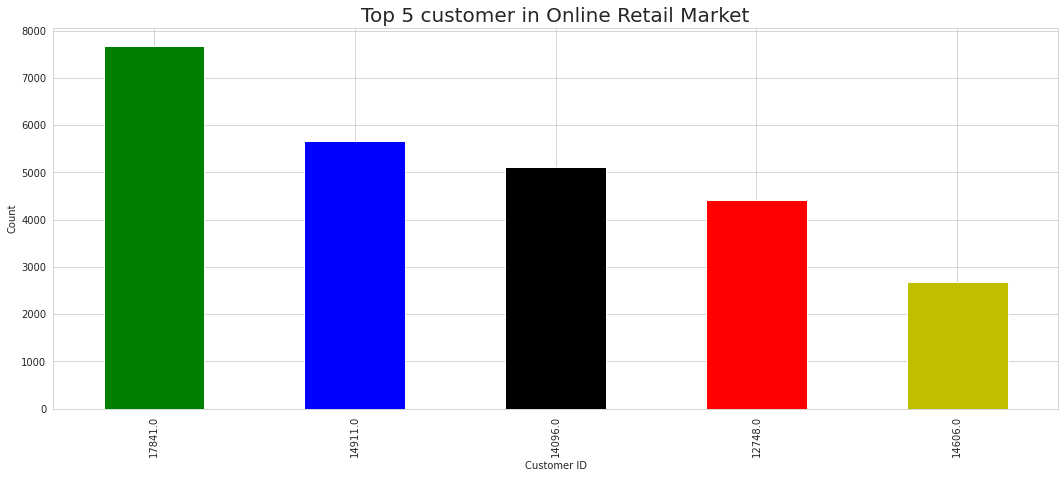

In [ ]:
my_colors2 = ['g', 'b', 'k', 'r', 'y', 'm', 'c']
df1['CustomerID'].value_counts().head(5).plot.bar(figsize = (18, 7),color=my_colors2)
plt.title('Top 5 customer in Online Retail Market', fontsize = 20)
plt.xlabel('Customer ID')
plt.ylabel('Count')
plt.show()

In [ ]:
df1.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Day', 'year', 'month',
       'month_day', 'hour'],
      dtype='object')

In [ ]:

# creating function for plotting graph 
def plot_count(parameter,datasource):
   sns.set_style("whitegrid")
   fig, ax = plt.subplots()
   fig.set_size_inches(15, 9)
   p=sns.countplot(x=parameter, data=datasource)


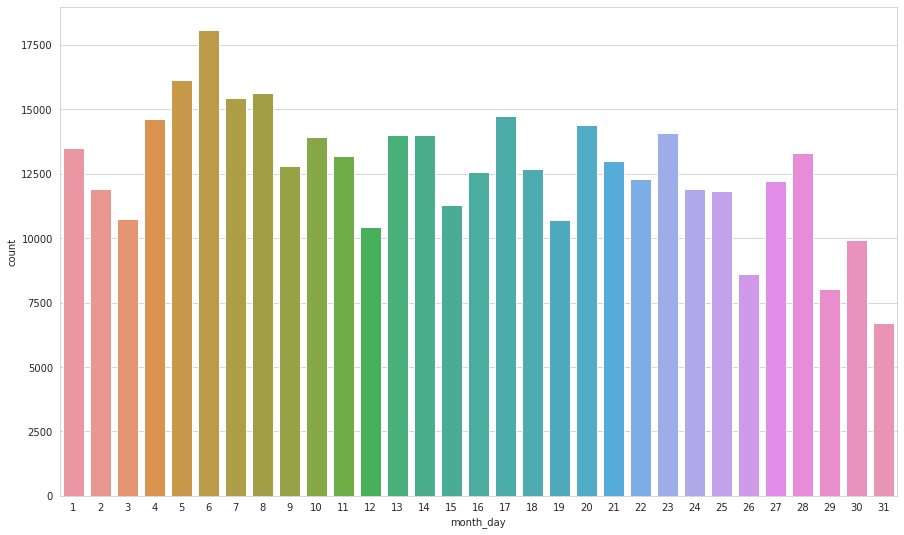

In [ ]:
plot_count('month_day',df1)

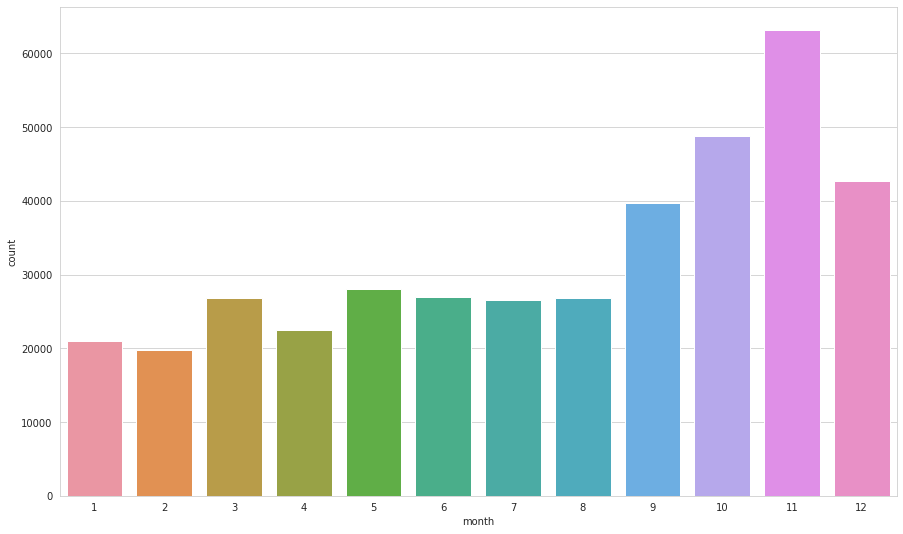

In [ ]:
plot_count('month',df1)

In [ ]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,year,month,month_day,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,2010,12,1,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,2010,12,1,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8


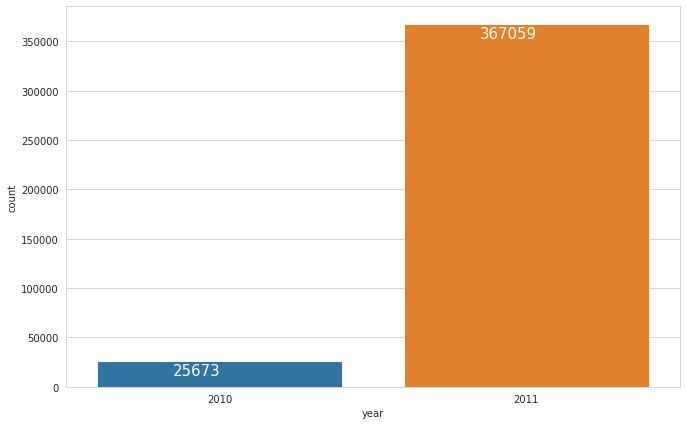

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
op=sns.countplot(x='year', data=df1)

for p in op.patches:
    op.annotate(f'\n{p.get_height()}', (p.get_x()+0.25, p.get_height()), va='center', color='white', size=15)
plt.show()

In [ ]:
df1['Day'].value_counts()

Thursday     79260
Wednesday    68043
Tuesday      65747
Monday       64237
Sunday       61214
Friday       54231
Name: Day, dtype: int64

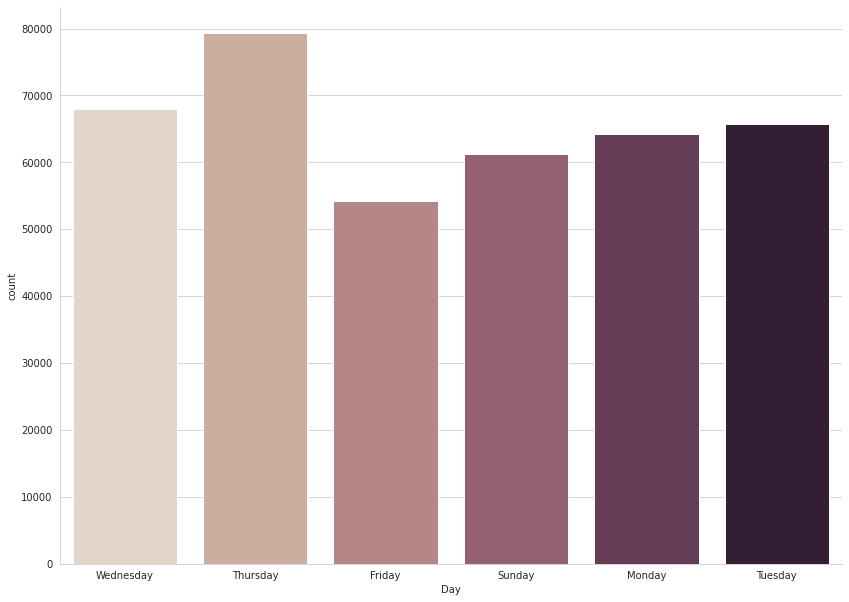

In [ ]:

sns.catplot(x="Day", kind="count", palette="ch:.25", data=df1,height=8.27, aspect=11.7/8.27);

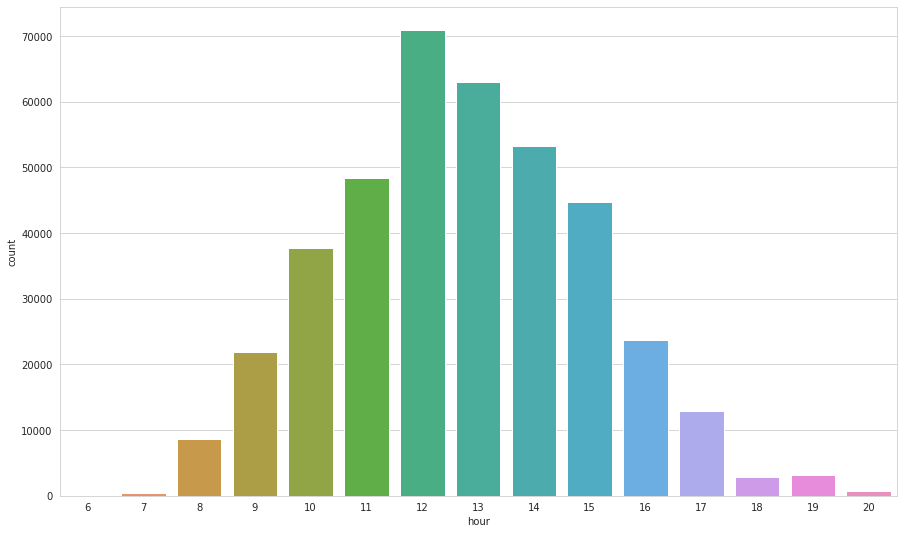

In [ ]:
plot_count('hour',df1)

In [ ]:
df1['Tot_amt']  = df1.Quantity * df1.UnitPrice


In [ ]:

df1.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,year,month,month_day,hour,Tot_amt
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,2010,12,1,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,20.34


In [ ]:
df1['CustomerID'].nunique()

4339

In [ ]:
gk = df1.groupby('CustomerID')

In [ ]:
gk.first()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Day,year,month,month_day,hour,Tot_amt
CustomerID,,,,,,,,,,,,,
12346.0,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,United Kingdom,Tuesday,2011,1,18,10,77183.60
12347.0,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-12-07 14:57:00,2.10,Iceland,Tuesday,2010,12,7,14,25.20
12348.0,539318,84992,72 SWEETHEART FAIRY CAKE CASES,72,2010-12-16 19:09:00,0.55,Finland,Thursday,2010,12,16,19,39.60
12349.0,577609,23112,PARISIENNE CURIO CABINET,2,2011-11-21 09:51:00,7.50,Italy,Monday,2011,11,21,9,15.00
12350.0,543037,21908,CHOCOLATE THIS WAY METAL SIGN,12,2011-02-02 16:01:00,2.10,Norway,Wednesday,2011,2,2,16,25.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,545712,82484,WOOD BLACK BOARD ANT WHITE FINISH,3,2011-03-07 09:52:00,7.90,United Kingdom,Monday,2011,3,7,9,23.70
18281.0,556464,22037,ROBOT BIRTHDAY CARD,12,2011-06-12 10:53:00,0.42,United Kingdom,Sunday,2011,6,12,10,5.04
18282.0,562525,21270,ANTIQUE CREAM CUTLERY CUPBOARD,1,2011-08-05 13:35:00,12.75,United Kingdom,Friday,2011,8,5,13,12.75


In [ ]:
max_index = df1['Tot_amt'].idxmax()
max_row = df1.loc[[max_index]]
max_row

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,year,month,month_day,hour,Tot_amt
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,Friday,2011,12,9,9,168469.6


In [ ]:
max_index = gk['Tot_amt'].idxmax()
max_index

CustomerID
12346.0     61619
12347.0    148290
12348.0     34099
12349.0    485574
12350.0     80335
            ...  
18280.0    111045
18281.0    222957
18282.0    519825
18283.0    494115
18287.0    198741
Name: Tot_amt, Length: 4339, dtype: int64

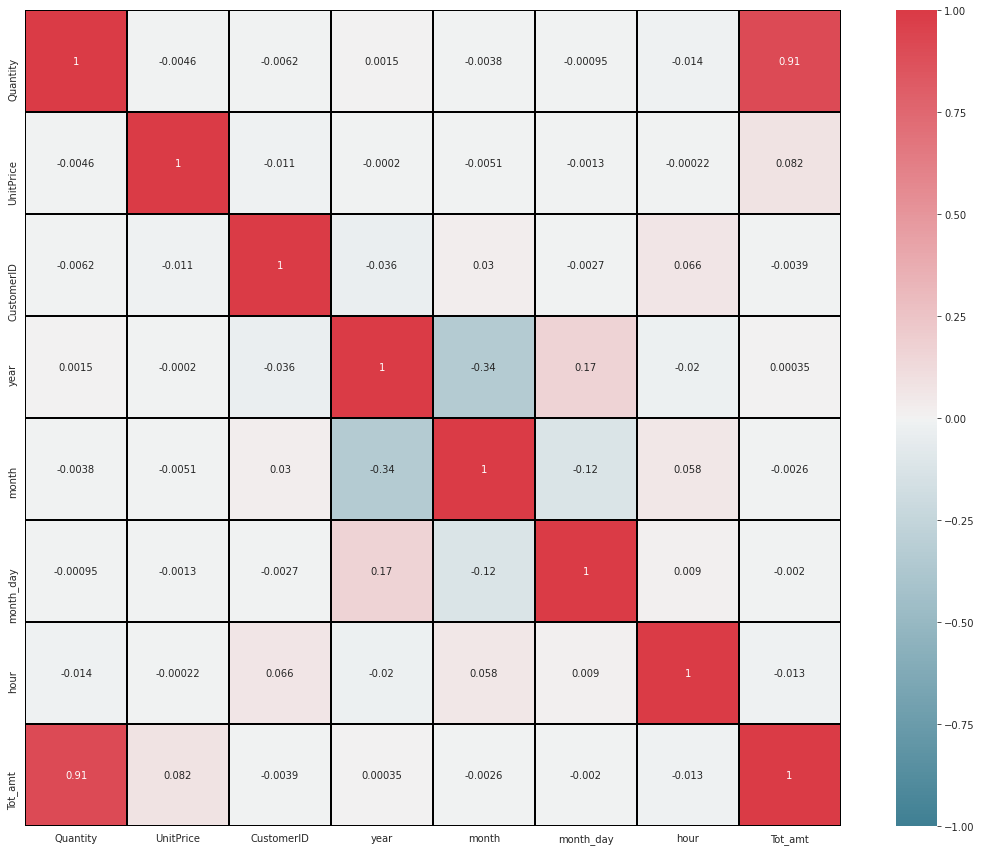

In [ ]:

# how all feautures are related to each other

f, ax = plt.subplots(figsize=(20,15))

corr = df1.corr()

sns.heatmap(corr,mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220,10, as_cmap=True),
            square=True, ax=ax,annot=True,linewidths=1 , linecolor= 'black',vmin = -1, vmax = 1)

plt.show()

In [ ]:
gk['Tot_amt'].value_counts()

CustomerID  Tot_amt
12346.0     77183.6     1
12347.0     15.0       24
            17.0       16
            13.2       14
            19.8       12
                       ..
18287.0     45.0        1
            52.2        1
            53.1        1
            59.4        1
            87.0        1
Name: Tot_amt, Length: 142615, dtype: int64

In [ ]:
amount = df1.sort_values(by=['Tot_amt'], ascending=False)

In [ ]:
amount.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,year,month,month_day,hour,Tot_amt
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,Friday,2011,12,9,9,168469.6
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,Tuesday,2011,1,18,10,77183.6
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.50,15098.0,United Kingdom,Friday,2011,6,10,15,38970.0


In [ ]:
amount.tail(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,year,month,month_day,hour,Tot_amt
358655,568158,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-09-25 12:22:00,0.0,16133.0,United Kingdom,Sunday,2011,9,25,12,0.0
454463,575579,22437,SET OF 9 BLACK SKULL BALLOONS,20,2011-11-10 11:49:00,0.0,13081.0,United Kingdom,Thursday,2011,11,10,11,0.0
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,2011-03-23 10:25:00,0.0,13239.0,United Kingdom,Wednesday,2011,3,23,10,0.0


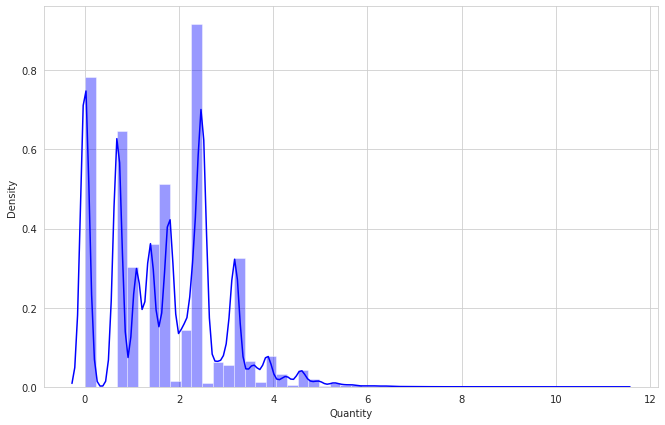

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.distplot(np.log(df1['Quantity']),color="B");

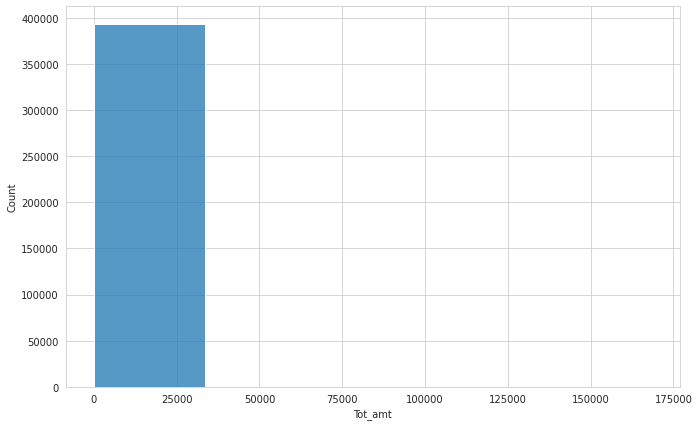

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.histplot(df1['Tot_amt'], kde = False,bins=5);

In [ ]:
#sns.pairplot(amount, hue="Day")

In [ ]:
# First we will keep a copy of data
df_cust = df1.copy()

RFM (Recency, Frequency, Monetary) analysis is a proven marketing model for behavior based customer segmentation. It groups customers based on their transaction history – how recently, how often and how much did they buy.

RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.

Customer ID / Email / Name etc: to identify them

Recency (R) as days since last purchase: How many days ago was their last purchase?

Frequency (F) as total number of transactions: How many times has the customer purchased from our store?

Monetary (M) as total money spent: How many $$ (or whatever is your currency of calculation) has this customer spent?

Quintiles is our recommended method to calculate RFM score

0-20 = 1st quintile

20-40 = 2nd quintile

40-60 = 3rd quintile

60-80 = 4th quintile

80-100 = 5th quintile

RFM calculations summary

Take your customer data, give a score from 1-5 to R, F and M values. Using quintiles works best since it works for all businesses and adjusts according to your data.



In [ ]:
df_working=df1[df1.Country=='United Kingdom']

In [ ]:
df_working.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349227 entries, 0 to 541893
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    349227 non-null  object        
 1   StockCode    349227 non-null  object        
 2   Description  349227 non-null  object        
 3   Quantity     349227 non-null  int64         
 4   InvoiceDate  349227 non-null  datetime64[ns]
 5   UnitPrice    349227 non-null  float64       
 6   CustomerID   349227 non-null  float64       
 7   Country      349227 non-null  object        
 8   Day          349227 non-null  object        
 9   year         349227 non-null  int64         
 10  month        349227 non-null  int64         
 11  month_day    349227 non-null  int64         
 12  hour         349227 non-null  int64         
 13  Tot_amt      349227 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(5), object(5)
memory usage: 40.0+ MB


In [ ]:
uk_data=df_working[['CustomerID','InvoiceDate','InvoiceNo','Quantity','UnitPrice','Tot_amt']]

In [ ]:
uk_data.head()

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,Tot_amt
0,17850.0,2010-12-01 08:26:00,536365,6,2.55,15.30
1,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
2,17850.0,2010-12-01 08:26:00,536365,8,2.75,22.00
3,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
4,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34


In [ ]:
uk_data['InvoiceDate'].min(),uk_data['InvoiceDate'].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:49:00'))

In [ ]:
PRESENT = dt.datetime(2011,12,10)
uk_data['InvoiceDate'] = pd.to_datetime(uk_data['InvoiceDate'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
rfm= uk_data.groupby('CustomerID').agg({'InvoiceDate': lambda date: (PRESENT - date.max()).days,
                                        'InvoiceNo': lambda num: len(num),
                                        'Tot_amt': lambda price: price.sum()})

In [ ]:
rfm.columns

Index(['InvoiceDate', 'InvoiceNo', 'Tot_amt'], dtype='object')

In [ ]:
rfm.columns=['monetary','frequency','recency']

In [ ]:
rfm['recency'] = rfm['recency'].astype(int)

In [ ]:
rfm.head()

,monetary,frequency,recency
CustomerID,,,
12346.0,325,1,77183
12747.0,2,103,4196
12748.0,0,4413,33053
12749.0,3,199,4090
12820.0,3,59,942


Customers with the lowest recency, highest frequency and monetary amounts considered as top customers.

In [425]:
rfm.describe()

,monetary,frequency,recency
count,3921.000000,3921.000000,3921.000000
mean,91.722265,89.065800,1857.462637
std,99.528532,214.022733,7477.732212
min,0.000000,1.000000,0.000000
25%,17.000000,17.000000,298.000000
50%,50.000000,40.000000,644.000000
75%,142.000000,98.000000,1570.000000
max,373.000000,7676.000000,259657.000000


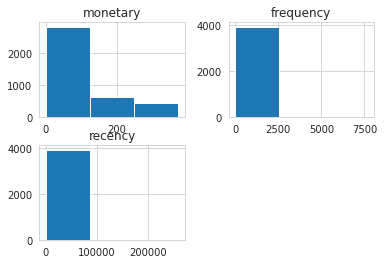

In [432]:
plot

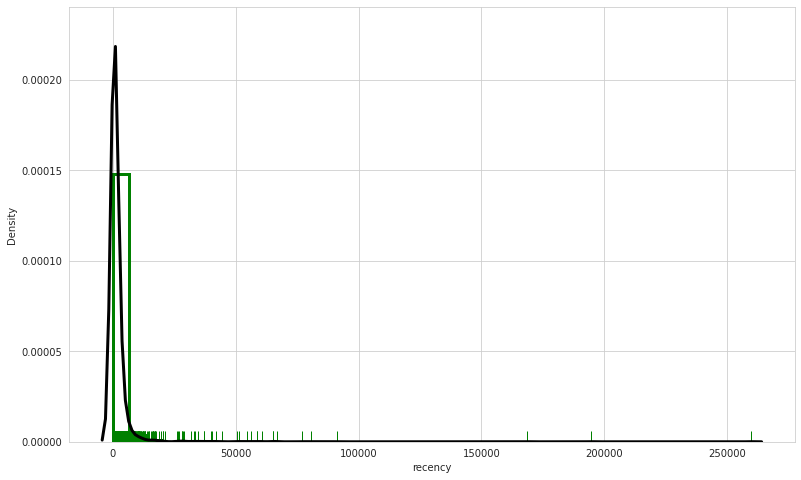

In [423]:
x= rfm['recency']

plt.figure(figsize=(13,8))
sns.distplot(x, rug=True, rug_kws={"color": "g"},
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"},
             bins=40
             )

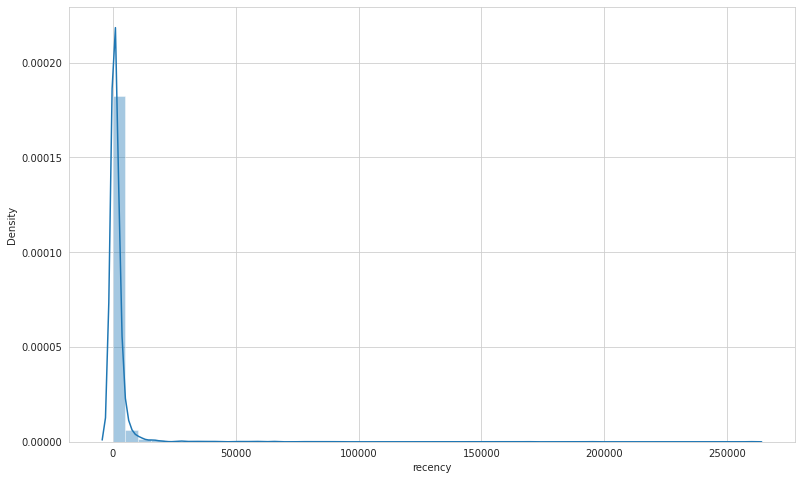

In [ ]:
x = rfm['recency']
plt.figure(figsize=(13,8))
sns.distplot(x)

In [ ]:

# Let's scale the data first
#scaler = StandardScaler()
#normalized_df = scaler.fit_transform(df)
#normalized_df

In [ ]:

#normalized_df.shape

In [ ]:
# Compute 'within cluster sum of squares' or WCSS metric for a range of k clusters
#wcss_values = []#
#for i in range(1,20):
#  kmeans = KMeans(n_clusters=i, init='k-means++')
#  kmeans.fit(normalized_df)
#  wcss_values.append(kmeans.inertia_)